In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\luisf\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype


# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

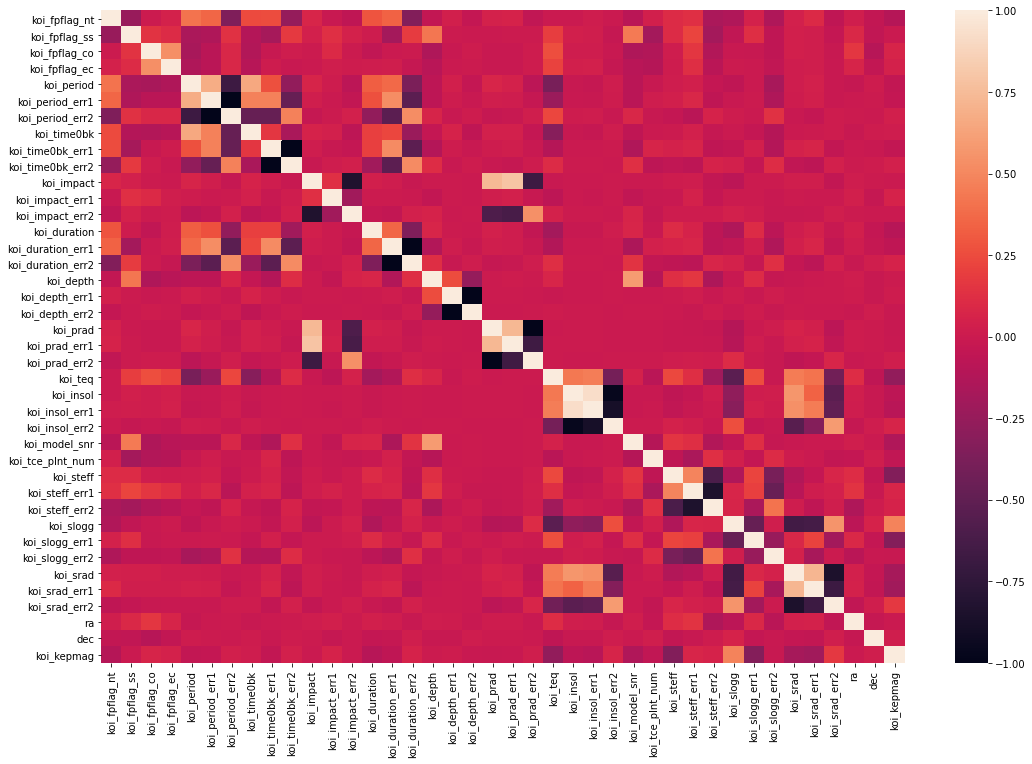

In [6]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr())
plt.show()

In [11]:
df.groupby("koi_disposition").size()

koi_disposition
CANDIDATE         1687
CONFIRMED         1800
FALSE POSITIVE    3504
dtype: int64

# Data Cleaning

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
x_scaler = MinMaxScaler()

In [14]:
features = df.drop("koi_disposition", axis=1)
x_scaler.fit(features)

features_scaled = x_scaler.transform(features)

In [15]:
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled["koi_disposition"] = df["koi_disposition"]

df_scaled.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,0.0,0.0,0.0,0.0,0.050570,0.001581,0.998419,0.031063,0.006171,0.993829,0.005813,0.000690,0.992532,0.031365,0.005743,0.994257,0.000563,0.000091,0.999909,0.000013,0.000015,0.999998,0.024082,8.303224e-07,7.934462e-07,1.000000,0.002673,0.142857,0.211107,0.119822,0.953260,0.831296,0.043478,0.904667,0.004547,0.004045,0.999412,0.552405,0.733837,0.692702,CONFIRMED
1,0.0,1.0,0.0,0.0,0.018338,0.000095,0.999905,0.040928,0.001006,0.998994,0.009613,0.059925,0.998702,0.011673,0.001688,0.998312,0.007021,0.000440,0.999560,0.000072,0.000181,0.999983,0.037461,3.588016e-06,8.581383e-06,0.999998,0.008251,0.000000,0.241179,0.233728,0.898442,0.845778,0.029891,0.825223,0.004219,0.008977,0.999249,0.784312,0.733360,0.700058,FALSE POSITIVE
2,0.0,1.0,0.0,0.0,0.001379,0.000002,0.999998,0.036828,0.000187,0.999813,0.012658,0.001344,0.998449,0.016184,0.000266,0.999734,0.005237,0.000033,0.999967,0.000166,0.000393,0.999963,0.089400,8.147390e-05,1.849393e-04,0.999959,0.055672,0.000000,0.237552,0.232249,0.899596,0.849539,0.036005,0.833168,0.003791,0.007744,0.999355,0.259712,0.742947,0.713365,FALSE POSITIVE
3,0.0,0.0,0.0,0.0,0.002116,0.000024,0.999976,0.037781,0.001971,0.998029,0.006954,0.002747,0.991942,0.010750,0.002079,0.997921,0.000387,0.000043,0.999957,0.000013,0.000041,0.999995,0.090154,8.459789e-05,2.417191e-04,0.999944,0.004341,0.000000,0.254628,0.250000,0.878246,0.825842,0.047554,0.791460,0.005208,0.012868,0.998719,0.406994,0.739203,0.706091,CONFIRMED
4,0.0,0.0,0.0,0.0,0.003618,0.000067,0.999933,0.038804,0.003324,0.996676,0.007559,0.001625,0.991032,0.021487,0.003332,0.996668,0.000440,0.000048,0.999952,0.000013,0.000042,0.999996,0.073276,3.906169e-05,1.162053e-04,0.999976,0.004264,0.142857,0.255761,0.279586,0.866128,0.834869,0.036685,0.772592,0.004797,0.012136,0.998989,0.751443,0.739105,0.723035,CONFIRMED


In [16]:
target_labels = []
for _, row in df_scaled.iterrows():
    if row.koi_disposition == "CANDIDATE":
        target_labels.append(0)
    elif row.koi_disposition == "CONFIRMED":
        target_labels.append(1)
    else:
        target_labels.append(2)
        
df_scaled["koi_disposition_label"] = target_labels
df_scaled.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition,koi_disposition_label
0,0.0,0.0,0.0,0.0,0.050570,0.001581,0.998419,0.031063,0.006171,0.993829,0.005813,0.000690,0.992532,0.031365,0.005743,0.994257,0.000563,0.000091,0.999909,0.000013,0.000015,0.999998,0.024082,8.303224e-07,7.934462e-07,1.000000,0.002673,0.142857,0.211107,0.119822,0.953260,0.831296,0.043478,0.904667,0.004547,0.004045,0.999412,0.552405,0.733837,0.692702,CONFIRMED,1
1,0.0,1.0,0.0,0.0,0.018338,0.000095,0.999905,0.040928,0.001006,0.998994,0.009613,0.059925,0.998702,0.011673,0.001688,0.998312,0.007021,0.000440,0.999560,0.000072,0.000181,0.999983,0.037461,3.588016e-06,8.581383e-06,0.999998,0.008251,0.000000,0.241179,0.233728,0.898442,0.845778,0.029891,0.825223,0.004219,0.008977,0.999249,0.784312,0.733360,0.700058,FALSE POSITIVE,2
2,0.0,1.0,0.0,0.0,0.001379,0.000002,0.999998,0.036828,0.000187,0.999813,0.012658,0.001344,0.998449,0.016184,0.000266,0.999734,0.005237,0.000033,0.999967,0.000166,0.000393,0.999963,0.089400,8.147390e-05,1.849393e-04,0.999959,0.055672,0.000000,0.237552,0.232249,0.899596,0.849539,0.036005,0.833168,0.003791,0.007744,0.999355,0.259712,0.742947,0.713365,FALSE POSITIVE,2
3,0.0,0.0,0.0,0.0,0.002116,0.000024,0.999976,0.037781,0.001971,0.998029,0.006954,0.002747,0.991942,0.010750,0.002079,0.997921,0.000387,0.000043,0.999957,0.000013,0.000041,0.999995,0.090154,8.459789e-05,2.417191e-04,0.999944,0.004341,0.000000,0.254628,0.250000,0.878246,0.825842,0.047554,0.791460,0.005208,0.012868,0.998719,0.406994,0.739203,0.706091,CONFIRMED,1
4,0.0,0.0,0.0,0.0,0.003618,0.000067,0.999933,0.038804,0.003324,0.996676,0.007559,0.001625,0.991032,0.021487,0.003332,0.996668,0.000440,0.000048,0.999952,0.000013,0.000042,0.999996,0.073276,3.906169e-05,1.162053e-04,0.999976,0.004264,0.142857,0.255761,0.279586,0.866128,0.834869,0.036685,0.772592,0.004797,0.012136,0.998989,0.751443,0.739105,0.723035,CONFIRMED,1


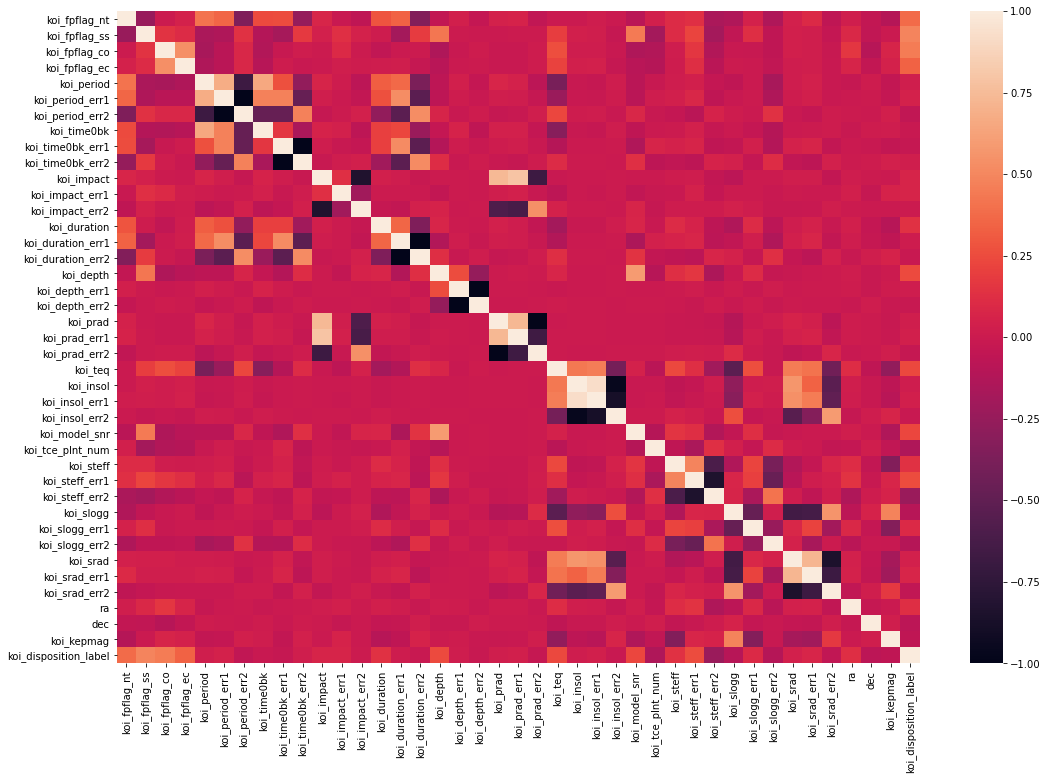

In [17]:
plt.figure(figsize=(18,12))
sns.heatmap(df_scaled.corr())
plt.show()

# Select your features (columns)

In [18]:
corrs = abs(df_scaled.corr()["koi_disposition_label"]).sort_values()

predictive_cols = []
for name, col in corrs.iteritems():
    if col > .05:
        predictive_cols.append(name)
        
predictive_cols

['koi_srad_err2',
 'koi_kepmag',
 'koi_impact_err1',
 'koi_impact',
 'dec',
 'koi_srad_err1',
 'koi_slogg_err1',
 'koi_slogg',
 'koi_slogg_err2',
 'ra',
 'koi_steff',
 'koi_duration',
 'koi_tce_plnt_num',
 'koi_steff_err2',
 'koi_model_snr',
 'koi_teq',
 'koi_depth',
 'koi_steff_err1',
 'koi_fpflag_ec',
 'koi_fpflag_nt',
 'koi_fpflag_co',
 'koi_fpflag_ss',
 'koi_disposition_label']

In [ ]:
#selected_features = list(df.columns[1:])
,
 

In [21]:
# Set features. This will also be used as your x values.
selected_features = df_scaled[['koi_srad_err2',
                        'koi_kepmag',
                        'koi_impact_err1',
                        'koi_impact',
                        'dec',
                         'koi_srad_err1',
                         'koi_slogg_err1',
                         'koi_slogg',
                         'koi_slogg_err2',
                         'ra',
                         'koi_steff',
                         'koi_duration',
                         'koi_tce_plnt_num',
                        'koi_steff_err2',
                         'koi_model_snr',
                        'koi_teq',
                         'koi_depth',
                         'koi_steff_err1',
                         'koi_fpflag_ec',
                         'koi_fpflag_nt',
                         'koi_fpflag_co',
                         'koi_fpflag_ss',
                         'koi_disposition_label']]

selected_features

,koi_srad_err2,koi_kepmag,koi_impact_err1,koi_impact,dec,koi_srad_err1,koi_slogg_err1,koi_slogg,koi_slogg_err2,ra,koi_steff,koi_duration,koi_tce_plnt_num,koi_steff_err2,koi_model_snr,koi_teq,koi_depth,koi_steff_err1,koi_fpflag_ec,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ss,koi_disposition_label
0,0.999412,0.692702,0.000690,0.005813,0.733837,0.004045,0.043478,0.831296,0.904667,0.552405,0.211107,0.031365,0.142857,0.953260,0.002673,0.024082,0.000563,0.119822,0.0,0.0,0.0,0.0,1
1,0.999249,0.700058,0.059925,0.009613,0.733360,0.008977,0.029891,0.845778,0.825223,0.784312,0.241179,0.011673,0.000000,0.898442,0.008251,0.037461,0.007021,0.233728,0.0,0.0,0.0,1.0,2
2,0.999355,0.713365,0.001344,0.012658,0.742947,0.007744,0.036005,0.849539,0.833168,0.259712,0.237552,0.016184,0.000000,0.899596,0.055672,0.089400,0.005237,0.232249,0.0,0.0,0.0,1.0,2
3,0.998719,0.706091,0.002747,0.006954,0.739203,0.012868,0.047554,0.825842,0.791460,0.406994,0.254628,0.010750,0.000000,0.878246,0.004341,0.090154,0.000387,0.250000,0.0,0.0,0.0,0.0,1
4,0.998989,0.723035,0.001625,0.007559,0.739105,0.012136,0.036685,0.834869,0.772592,0.751443,0.255761,0.021487,0.142857,0.866128,0.004264,0.073276,0.000440,0.279586,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.997804,0.620878,0.000269,0.007589,0.659700,0.012059,0.156929,0.799135,0.812314,0.864094,0.224934,0.033525,0.000000,0.912291,0.000751,0.057427,0.000052,0.250000,1.0,0.0,0.0,0.0,2
6987,0.999239,0.588148,0.000596,0.012420,0.667345,0.009131,0.023777,0.842957,0.805362,0.792725,0.224934,0.022079,0.000000,0.904212,0.049895,0.136947,0.001020,0.205621,0.0,0.0,1.0,1.0,2
6988,0.998902,0.643938,0.004945,0.000427,0.671749,0.013138,0.038043,0.826970,0.777557,0.304294,0.261277,0.021298,0.000000,0.873053,0.000994,0.104014,0.000027,0.244083,0.0,0.0,0.0,0.0,0
6989,0.998902,0.695843,0.003612,0.001458,0.672578,0.013138,0.038043,0.827534,0.777557,0.654426,0.265357,0.005044,0.000000,0.863820,0.001182,0.145866,0.000062,0.285503,0.0,0.0,1.0,0.0,2


# Create a Train Test Split

Use `koi_disposition` for the y values

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve


from sklearn.model_selection import train_test_split

In [26]:
features = selected_features.drop(columns="koi_disposition_label")
target = selected_features["koi_disposition_label"]

In [29]:
X = features.to_numpy()
y = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
X_train

array([[9.99190946e-01, 7.27498140e-01, 1.16904372e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99412473e-01, 7.09397471e-01, 5.50619593e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.98921262e-01, 6.25919497e-01, 2.18611176e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.85350349e-01, 2.29936358e-01, 7.59878419e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99364315e-01, 7.39069345e-01, 3.27332242e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99431736e-01, 6.57988263e-01, 1.62497077e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [32]:
# Scale your data
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train, y_train)
#X_train_scaled

In [31]:
#X_test_scaled = scaler.fit_transform(X_test, y_test)
#X_test_scaled 

# Train the Model



In [38]:
# initialize
rf = RandomForestClassifier()

# fit
rf = rf.fit(X_train, y_train)

# predictions
in_preds = rf.predict(X_train)
out_preds = rf.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# # roc curve
# plot_roc_curve(rf, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# # roc curve
# plot_roc_curve(rf, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1440
           2       1.00      1.00      1.00      2803

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592

In Sample Confusion Matrix: 
[[1349    0    0]
 [   0 1440    0]
 [   0    0 2803]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       338
           1       0.81      0.83      0.82       360
           2       0.98      1.00      0.99       701

    accuracy                           0.90      1399
   macro avg       0.87      0.87      0.87      1399
weighted avg       0.90      0.90      0.90      1399

Out Sample Confusion Matrix: 
[[264  70   4]
 [ 52 299   9]


In [39]:
# initialize
dt = DecisionTreeClassifier()

# fit
dt = dt.fit(X_train, y_train)

# predictions
in_preds = dt.predict(X_train)
out_preds = dt.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(dt, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(dt, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()



Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1349
           1       1.00      1.00      1.00      1440
           2       1.00      1.00      1.00      2803

    accuracy                           1.00      5592
   macro avg       1.00      1.00      1.00      5592
weighted avg       1.00      1.00      1.00      5592

In Sample Confusion Matrix: 
[[1349    0    0]
 [   0 1440    0]
 [   0    0 2803]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       338
           1       0.73      0.72      0.73       360
           2       0.98      0.97      0.98       701

    accuracy                           0.85      1399
   macro avg       0.81      0.81      0.81      1399
weighted avg       0.85      0.85      0.85      1399

Out Sample Confusion Matrix: 
[[248  87   3]
 [ 90 260  10]


In [40]:
# initialize
ada = AdaBoostClassifier()

# fit
ada = ada.fit(X_train, y_train)

# predictions
in_preds = ada.predict(X_train)
out_preds = ada.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")

# roc curve
# plot_roc_curve(ada, X_train, y_train)
# plt.title("In Sample ROC Curve")
# plt.show()

print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")

# roc curve
# plot_roc_curve(ada, X_test, y_test)
# plt.title("Out Sample ROC Curve")
# plt.show()

Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1349
           1       0.65      0.82      0.72      1440
           2       0.99      0.93      0.96      2803

    accuracy                           0.83      5592
   macro avg       0.80      0.80      0.80      5592
weighted avg       0.85      0.83      0.84      5592

In Sample Confusion Matrix: 
[[ 881  451   17]
 [ 253 1176   11]
 [   6  194 2603]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       338
           1       0.64      0.82      0.72       360
           2       0.99      0.90      0.95       701

    accuracy                           0.83      1399
   macro avg       0.81      0.81      0.80      1399
weighted avg       0.85      0.83      0.84      1399

Out Sample Confusion Matrix: 
[[237  99   2]
 [ 63 295   2]


In [46]:
# initialize
svm = SVC()

# fit
svm = svm.fit(X_train, y_train)

# predictions
in_preds = svm.predict(X_train)
out_preds = svm.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")



print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")



Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1349
           1       0.65      0.71      0.68      1440
           2       0.98      1.00      0.99      2803

    accuracy                           0.82      5592
   macro avg       0.77      0.76      0.76      5592
weighted avg       0.82      0.82      0.82      5592

In Sample Confusion Matrix: 
[[ 785  544   20]
 [ 384 1021   35]
 [   5    0 2798]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.59      0.62       338
           1       0.65      0.69      0.67       360
           2       0.98      1.00      0.99       701

    accuracy                           0.82      1399
   macro avg       0.76      0.76      0.76      1399
weighted avg       0.82      0.82      0.82      1399

Out Sample Confusion Matrix: 
[[200 136   2]
 [102 248  10]


In [49]:
# initialize
knn = KNeighborsClassifier(n_neighbors=20)

# fit
knn = knn.fit(X_train, y_train)

# predictions
in_preds = knn.predict(X_train)
out_preds = knn.predict(X_test)

# evaluation
print("Model Evaluation Report")
print(f"In Sample Classification Report: \n{classification_report(y_train, in_preds)}")
print(f"In Sample Confusion Matrix: \n{confusion_matrix(y_train, in_preds)}")



print()
print(f"Out Sample Classification Report: \n{classification_report(y_test, out_preds)}")
print(f"Out Sample Confusion Matrix: \n{confusion_matrix(y_test, out_preds)}")


Model Evaluation Report
In Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      1349
           1       0.67      0.76      0.71      1440
           2       0.98      1.00      0.99      2803

    accuracy                           0.84      5592
   macro avg       0.79      0.78      0.78      5592
weighted avg       0.84      0.84      0.83      5592

In Sample Confusion Matrix: 
[[ 793  536   20]
 [ 317 1088   35]
 [   4    1 2798]]

Out Sample Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       338
           1       0.61      0.67      0.64       360
           2       0.98      1.00      0.99       701

    accuracy                           0.80      1399
   macro avg       0.74      0.73      0.73      1399
weighted avg       0.80      0.80      0.80      1399

Out Sample Confusion Matrix: 
[[180 156   2]
 [108 242  10]


In [42]:
print(f"Training Data Score: {ada.score(X_train, y_train)}")
print(f"Testing Data Score: {ada.score(X_test, y_test)}")

Training Data Score: 0.8333333333333334
Testing Data Score: 0.8327376697641172


In [43]:
print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9027877055039314


In [44]:
print(f"Training Data Score: {dt.score(X_train, y_train)}")
print(f"Testing Data Score: {dt.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8513223731236598


In [48]:
print(f"Training Data Score: {svm.score(X_train, y_train)}")
print(f"Testing Data Score: {svm.score(X_test, y_test)}")

Training Data Score: 0.8233190271816881
Testing Data Score: 0.8205861329521087


In [50]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.8367310443490701
Testing Data Score: 0.8020014295925662


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [52]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

rf_param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,8],
    'criterion' :['gini', 'entropy']
}


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

#ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_rf = GridSearchCV(rf, param_grid=rf_param_grid, verbose=10)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.855, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.811, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.833, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.826, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, score=0.856, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.851, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.835, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.813, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.851, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=100, score=0.835, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=100, score=0.894, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=100, score=0.887, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=100, score=0.884, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=100, score=0.888, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=auto, n_estimators=100, score=0.885, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=log2

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   23.8s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100]},
             verbose=10)

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

#ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ada = GridSearchCV(ada, param_grid=ada_param_grid)
grid_search_ada.fit(X_train_scaled, y_train)

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

dt_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

#ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_dt = GridSearchCV(ada, param_grid=dt_param_grid)
grid_search_dt.fit(X_train_scaled, y_train)

In [ ]:
# Train the model with GridSearch

In [53]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
0.887875067343862


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'my_model.joblib'
joblib.dump(your_model, filename)